In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
FBI=pd.read_excel('FBI_gun_murders_2019.xls',header=3,skipfooter=5)
FBI.drop(FBI.columns[3:], axis=1, inplace=True)
FBI.rename(columns={'Total\nmurders1':'Murders','Total\nfirearms':'Gun_Murders'}, inplace=True)
FBI['State']=FBI['State'].str.replace('\d+','')

C:\Users\josep\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [66]:
census=pd.read_excel('nst-est2019-01.xlsx',header=3,skiprows=range(4,9),skipfooter=7)
census.rename(columns={census.columns[0]:'State'}, inplace=True)
census['State']=census['State'].str.replace('.','')

C:\Users\josep\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
RAND=pd.read_excel('TL-354-State-Level Estimates of Household Firearm Ownership.xlsx',sheet_name='State-Level Data & Factor Score')

In [103]:
RAND_2016=RAND[RAND.Year == 2016].copy().reset_index()

In [41]:
def plot_rand(year):
    RAND_year=RAND[RAND.Year == year]
    
    plt.figure(figsize=(20,5))
    plt.bar(RAND_year.sort_values(by=['HFR']).STATE,RAND_year.sort_values(by=['HFR']).HFR,width=.3,)
    plt.xticks(rotation=90)

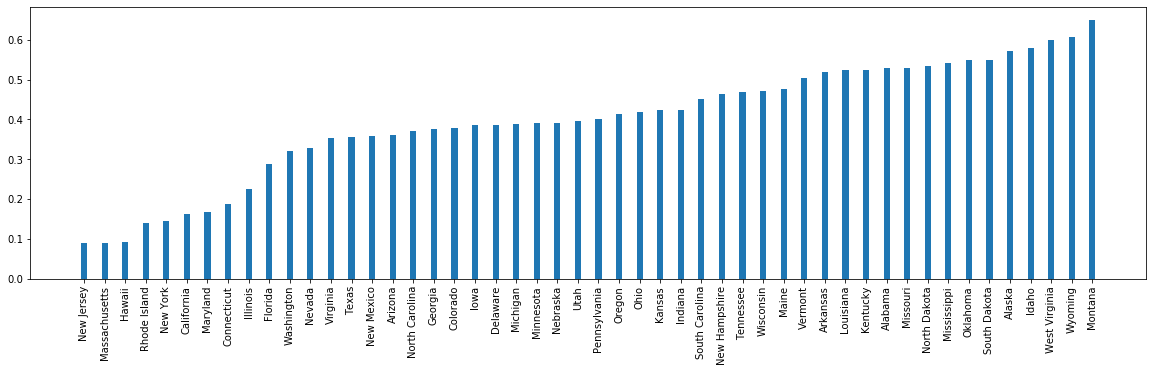

In [43]:
plot_rand(2016)

In [102]:
murder_2019=pd.concat([FBI,census[2019]], axis=1, join='outer')
murder_2019['Murders_per_100k']=murder_2019['Murders']/(murder_2019[2019]/100000)
murder_2019['Gun_Murders_per_100k']=murder_2019['Gun_Murders']/(murder_2019[2019]/100000)

In [110]:
fox_data=pd.concat([murder_2019.drop(labels=8).reset_index(),RAND_2016.HFR], axis=1, join='outer').drop(columns='index')
fox_data.rename(columns={2019:'Pop_2019'}, inplace=True)
#Alabama, Florida, and Illonois are dropped because the FBI data is incomplete for those states
fox_data.drop([0,8,12], inplace=True)
fox_data

,State,Murders,Gun_Murders,Pop_2019,Murders_per_100k,Gun_Murders_per_100k,HFR
1,Alaska,69,44,731545,9.432092,6.014668,0.572
2,Arizona,337,213,7278717,4.629937,2.926340,0.360
3,Arkansas,231,177,3017804,7.654573,5.865192,0.518
4,California,1679,1142,39512223,4.249318,2.890245,0.163
5,Colorado,209,135,5758736,3.629269,2.344264,0.379
6,Connecticut,104,65,3565287,2.917016,1.823135,0.188
7,Delaware,48,40,973764,4.929326,4.107771,0.387
9,Georgia,445,367,10617423,4.191224,3.456583,0.377
10,Hawaii,32,9,1415872,2.260091,0.635651,0.091
11,Idaho,35,16,1787065,1.958519,0.895323,0.578


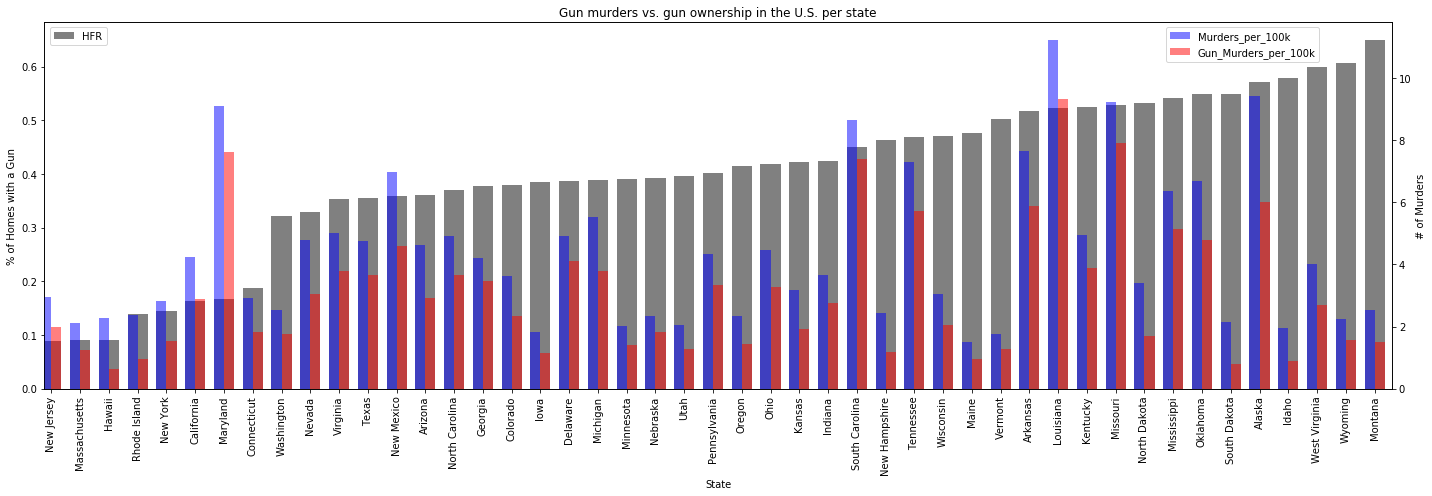

In [159]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(20,7))

ax= fig.add_subplot(111)
ax2 = ax.twinx()

fox_data.sort_values(by=['HFR']).plot(x='State', y='HFR',kind='bar', color='grey', ax=ax, width=width*2, align='center')
fox_data.sort_values(by=['HFR']).plot(x='State', y='Murders_per_100k',kind='bar', color='blue', ax=ax2, width=width,position=1,alpha=.5)
fox_data.sort_values(by=['HFR']).plot(x='State', y='Gun_Murders_per_100k',kind='bar', color='red', ax=ax2, width=width,position=0, alpha=.5)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of Homes with a Gun')
ax2.set_ylabel('# of Murders')
ax.set_title('Gun murders vs. gun ownership in the U.S. per state')
ax.legend(bbox_to_anchor=(.05, 1))
ax2.legend(bbox_to_anchor=(.95, 1))


fig.tight_layout()

plt.show()